In [43]:
import numpy as np
import plotly.express as px
import pandas as pd

In [44]:
df = pd.read_csv('life_expectancy.csv')

In [45]:
df.sample(frac = 0.01)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1085,Guinea,2004,Developing,54.0,334.0,33,0.34,18.930113,NaN,10,...,65.0,3.14,6.0,2.8,386.328828,949229.0,9.5,9.5,0.325,5.1
1725,Mongolia,2006,Developing,65.0,271.0,2,2.91,122.120649,98.0,26,...,98.0,4.68,99.0,0.1,1334.651896,255812.0,2.2,2.4,0.649,12.7
2084,Qatar,2002,Developing,76.4,85.0,0,0.87,188.678294,98.0,34,...,96.0,2.71,96.0,0.1,2999.654920,NaN,4.8,4.5,0.807,12.2
271,Belize,2000,Developing,68.3,196.0,0,4.79,219.023984,76.0,0,...,91.0,3.98,91.0,0.3,3364.423711,247315.0,3.8,3.7,0.668,11.7
1065,Guatemala,2008,Developing,79.0,19.0,13,2.21,472.223499,95.0,0,...,96.0,6.65,95.0,0.4,2794.221890,146366.0,1.3,1.3,0.589,10.4
2223,Sao Tome and Principe,2009,Developing,65.8,21.0,0,4.13,11.136087,98.0,0,...,99.0,6.65,98.0,0.9,199.571460,17813.0,6.3,6.2,0.533,10.1
1605,Maldives,2012,Developing,77.6,65.0,0,0.01,1259.940376,99.0,0,...,99.0,9.16,99.0,0.1,6541.746500,385.0,13.8,13.9,0.675,12.1
2545,Syrian Arab Republic,2007,Developing,73.8,121.0,8,0.83,17.981362,83.0,403,...,83.0,3.72,8.0,0.1,258.352900,1963286.0,6.4,6.2,0.644,11.5
398,Bulgaria,2001,Developed,71.6,16.0,1,10.72,25.062629,93.0,8,...,94.0,7.23,94.0,0.1,1764.973870,89142.0,2.4,2.5,0.713,12.9
661,Cuba,2011,Developing,78.8,92.0,1,4.14,102.064578,96.0,0,...,99.0,1.60,97.0,0.1,675.924360,NaN,3.4,3.2,0.780,16.5


In [46]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [47]:
df = pd.DataFrame(df)

# Assuming df_main should be a copy of df before interpolation (if needed)
df_main = df.copy()

# Interpolating specific columns
filled_col = df[['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B']].interpolate()

# Correctly assigning interpolated columns back to df_main
df_main['Life expectancy '] = filled_col['Life expectancy ']
df_main['Adult Mortality'] = filled_col['Adult Mortality']
df_main['Alcohol'] = filled_col['Alcohol']
df_main['Hepatitis B'] = filled_col['Hepatitis B']

print(df_main)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

### TASK 1


### TASK 2: PLOT CHART

In [48]:
freq_table = pd.pivot_table(df_main, index='Year', columns= 'Status', aggfunc='size')
print(freq_table)

Status  Developed  Developing
Year                         
2000           32         151
2001           32         151
2002           32         151
2003           32         151
2004           32         151
2005           32         151
2006           32         151
2007           32         151
2008           32         151
2009           32         151
2010           32         151
2011           32         151
2012           32         151
2013           32         161
2014           32         151
2015           32         151


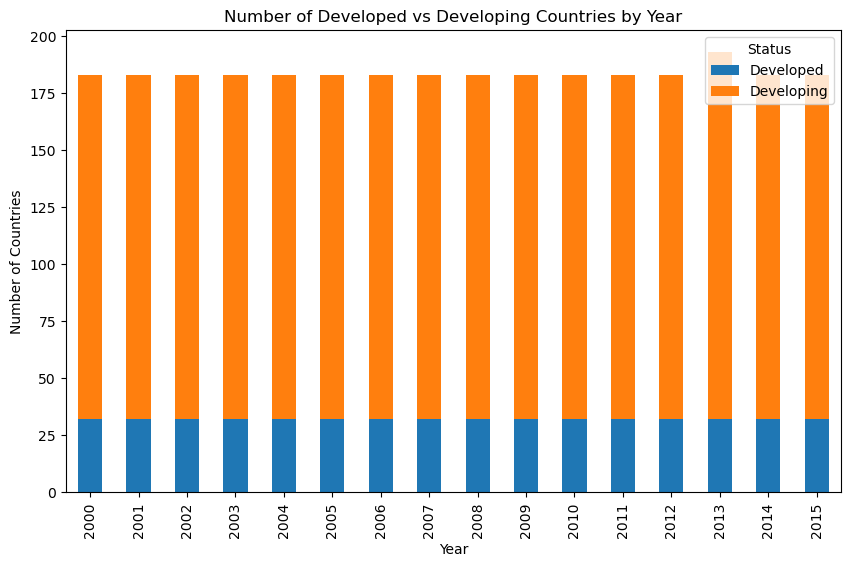

In [49]:
import matplotlib.pyplot as plt

# Plotting
freq_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Developed vs Developing Countries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='Status')
plt.show()


Frequency Table:
Developing    2426
Developed      512
Name: Status, dtype: int64


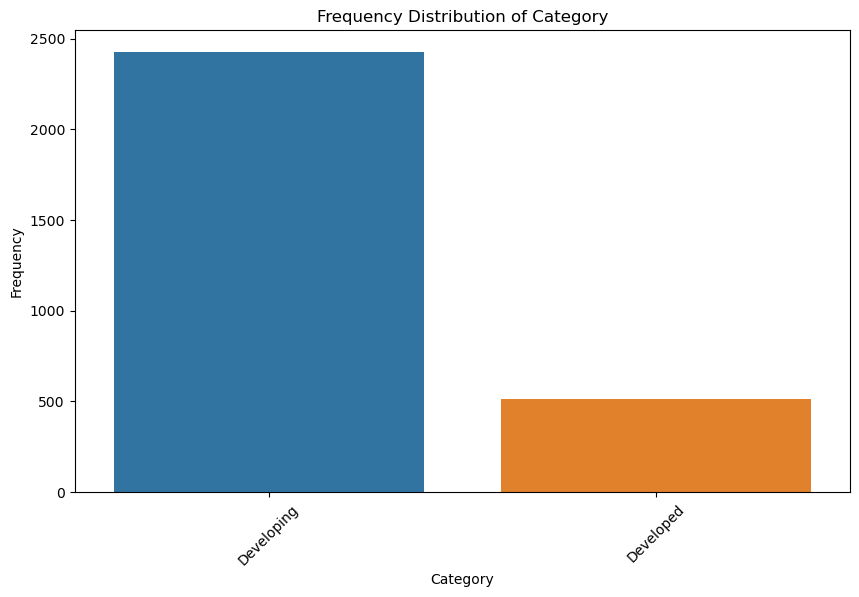

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Category' is your categorical column
category_counts = df_main['Status'].value_counts()

# Print frequency table
print("Frequency Table:")
print(category_counts)

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Frequency Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotating the labels if they overlap
plt.show()


In [51]:
df_main.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


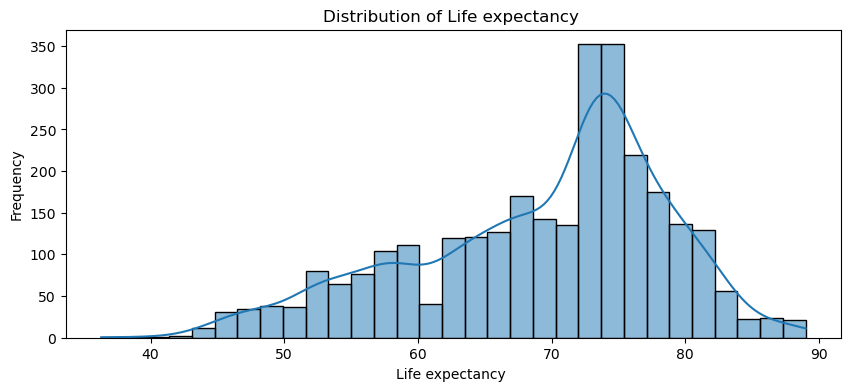

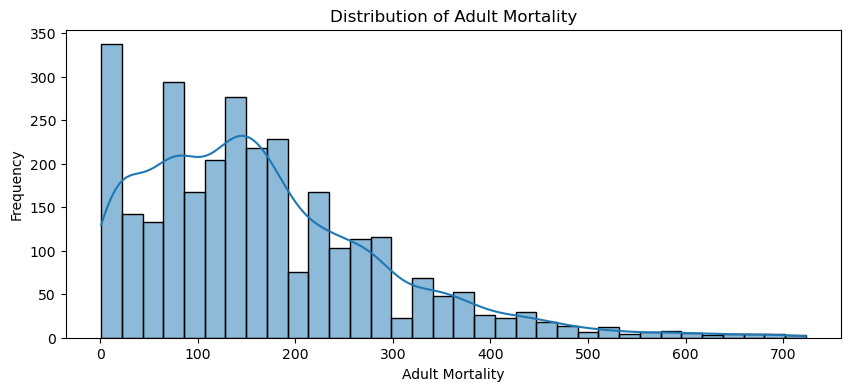

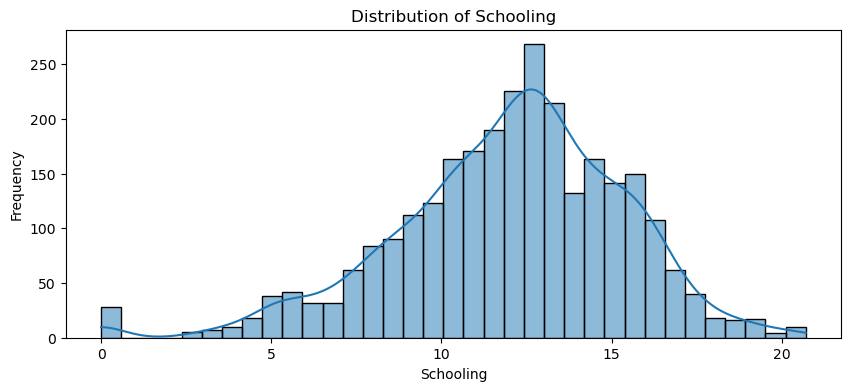

In [52]:
# Selecting quantitative variables
quantitative_vars = ['Life expectancy ', 'Adult Mortality', 'Schooling']

# Plot histograms and calculate summary statistics for each quantitative variable
for var in quantitative_vars:
    # Histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(df_main[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
    


In [53]:
print(df_main.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


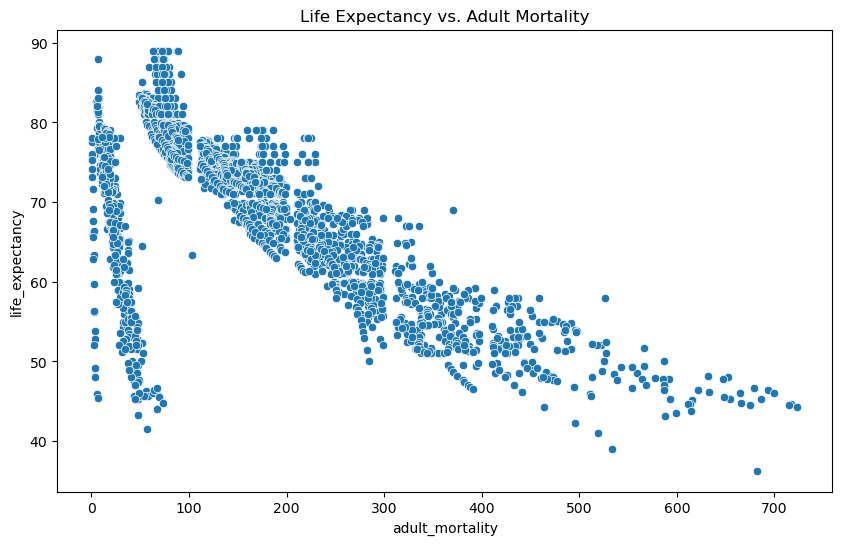

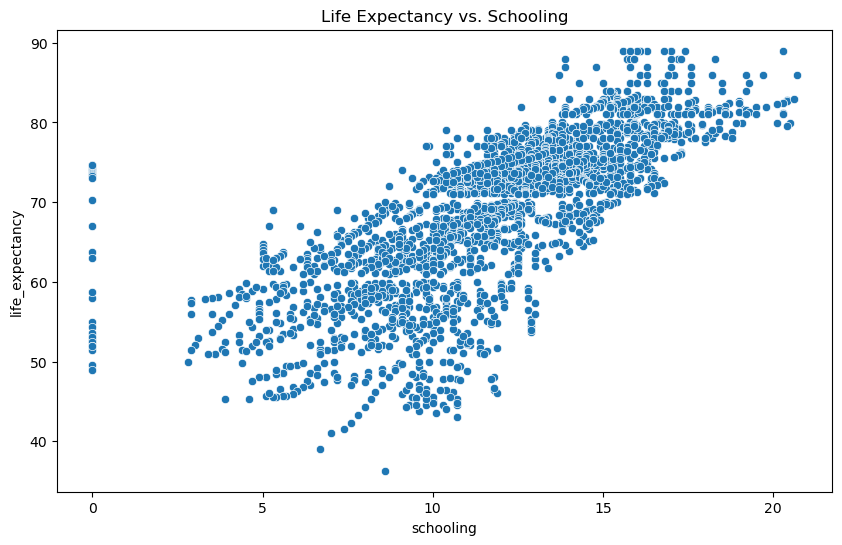

In [54]:
# Remove trailing spaces and standardize capitalization
df_main.columns = df_main.columns.str.strip().str.replace(' ', '_').str.lower()

# Check new column names
print(df_main.columns)

# After renaming, your plot code would look cleaner:
# Scatter plot of Adult Mortality vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='adult_mortality', y='life_expectancy')
plt.title('Life Expectancy vs. Adult Mortality')
plt.show()

# Scatter plot of Infant Deaths vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='schooling', y='life_expectancy')
plt.title('Life Expectancy vs. Schooling')
plt.show()


# Son0

In [55]:
X1 = df_main['income_composition_of_resources']
X2 = df_main['schooling']
Y = df_main['life_expectancy']
d

NameError: name 'd' is not defined

$ r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}} $

In [ ]:
def correlation_coefficient(X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    A = (X-X_mean)
    B = (Y-Y_mean)
    r = np.sum( A*B) / np.sqrt(np.sum(A**2)*np.sum(B**2))
    return r


In [ ]:
correlation_coefficient(X1,Y),correlation_coefficient(X2,Y)

(0.6920627148923447, 0.7155543601912074)

# $ \hat{Y} = Intercept + Slope*X $
$Slope = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}                   $ <br>
$Intercept = \bar{y} - Slope*\bar{x}$               <br>

In [ ]:
def linear_regression_line (X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    A = (X-X_mean)
    B = (Y-Y_mean)
    S = np.sum(A*B) / np.sum(A**2)
    I = Y_mean - S*X_mean
    print(f"linear regression line: Y = {round(I,3)} + {round(S,3)}*X")
    return I,S


In [ ]:
I1,S1 = linear_regression_line(X1,Y)
I2,S2 = linear_regression_line(X2,Y)

linear regression line: Y = 49.048 + 32.136*X
linear regression line: Y = 44.213 + 2.085*X


In [ ]:
Y_predict1 = I1 + S1*X1
Y_predict2 = I2 + S2*X2
residual1 = Y-Y_predict1
residual2 = Y-Y_predict2


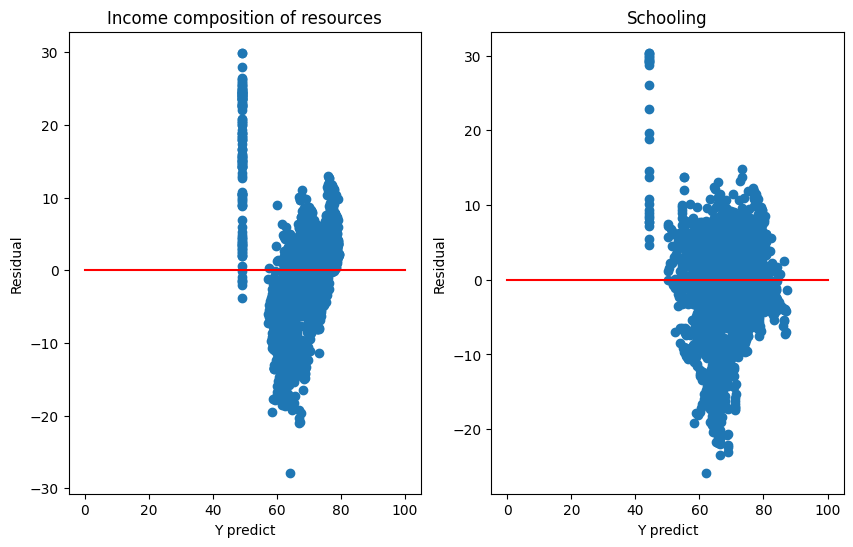

In [ ]:
figs,(A,B) = plt.subplots(1,2,figsize = (10,6))
A.scatter(Y_predict1,residual1)
A.set_xlabel('Y predict')
A.set_ylabel('Residual')
A.set_title("Income composition of resources")
A.plot([0, 100], [0,0], 'r-')
B.scatter(Y_predict2,residual2)
B.set_xlabel('Y predict')
B.set_ylabel('Residual')
B.set_title("Schooling")
B.plot([0, 100], [0,0], 'r-')


plt.show()

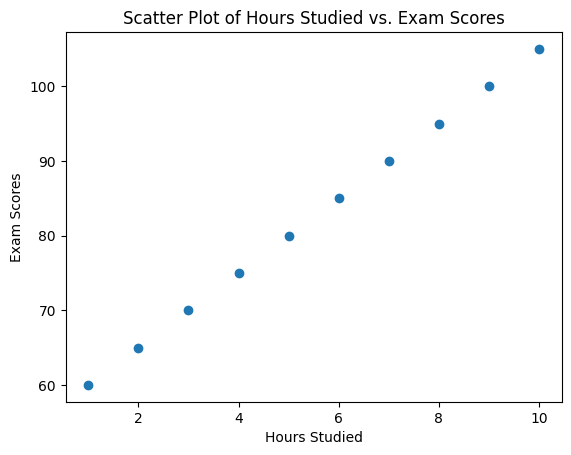

In [ ]:
import matplotlib.pyplot as plt

# Example data
hours_studied = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
exam_scores = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105]

# Create a scatter plot
plt.scatter(hours_studied, exam_scores)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.title('Scatter Plot of Hours Studied vs. Exam Scores')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

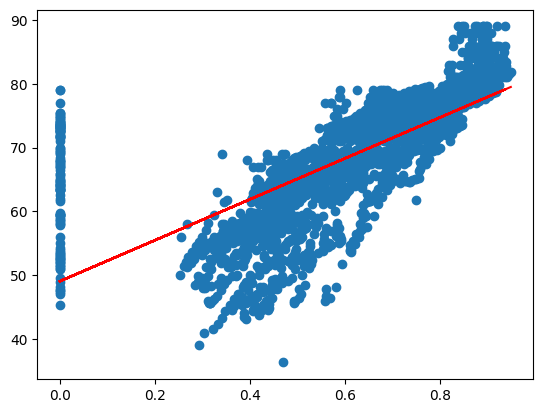

In [ ]:
plt.scatter(X1,Y)
plt.plot(X1,Y_predict1,'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

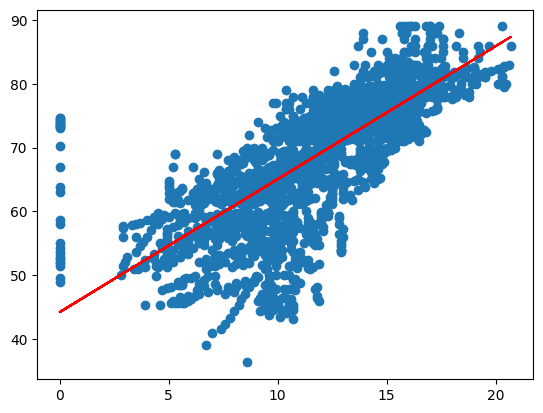

In [ ]:
plt.scatter(X2,Y)
plt.plot(X2,Y_predict2,'r')
plt.show